# Non-Linear Regression

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
%matplotlib inline

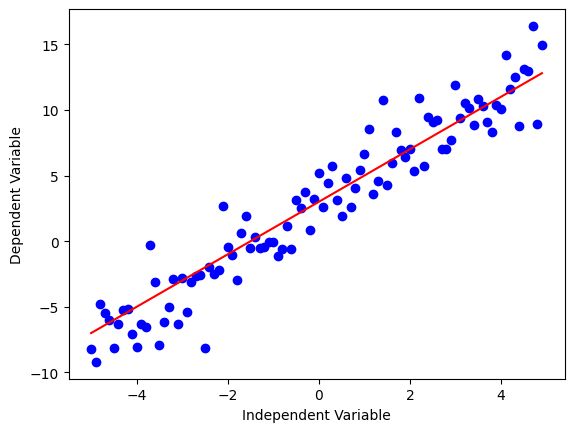

In [6]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = 2*(x)+3
y_noise = 2 * np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x , y_data ,  'bo')
plt.plot(x , y , 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()


x = np.arange(-5.0 , 5.0 , 0.1)
y = 1*(x**3)+ 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x , y_data ,  'bo')
plt.plot(x , y , 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()



## Quadratic 

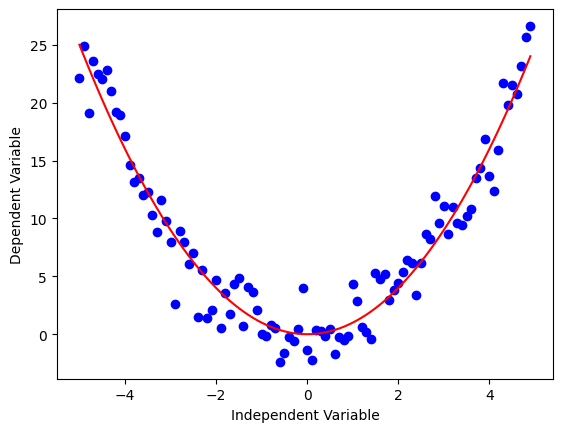

In [8]:
x = np.arange(-5.0 , 5.0 , 0.1)

y = np.power(x,2)
y_noise = 2 *np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x , y_data ,  'bo')
plt.plot(x , y , 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()


## Exponential

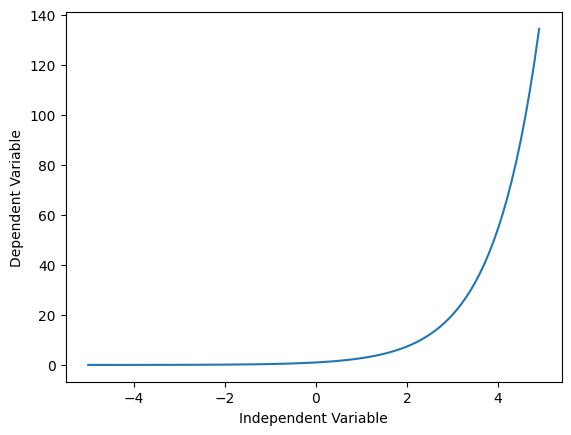

In [11]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = np.exp(x) 
plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()


## Logarithmic

C:\Users\sajjad\AppData\Local\Temp\ipykernel_15560\2663115512.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


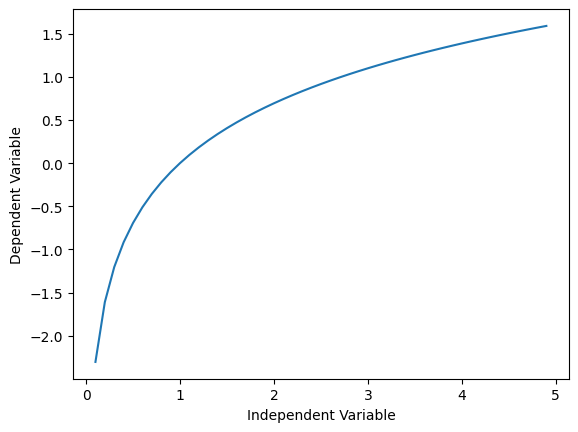

In [12]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = np.log(x)
plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Sigmoidal / Logistic

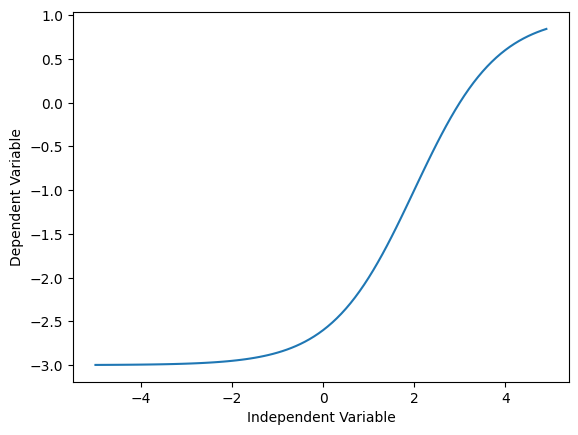

In [13]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = 1 - 4 /(1 + np.power(3 , x-2))
plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Non Linear Regression Example

In [14]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


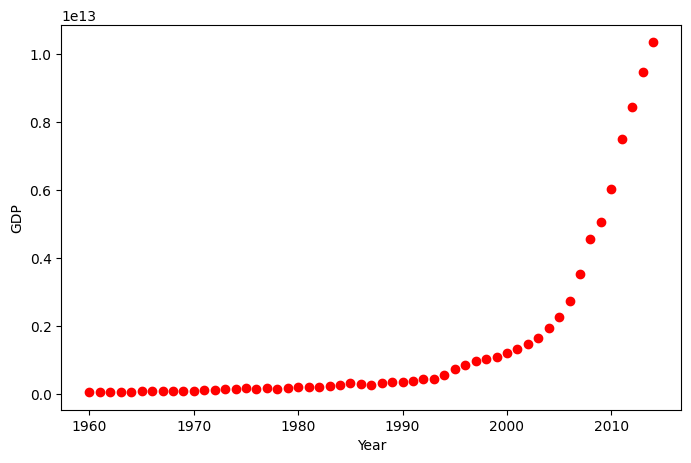

In [15]:
plt.figure(figsize=(8,5))
x_data , y_data = (df['Year'].values , df['Value'].values)
plt.plot(x_data , y_data , 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

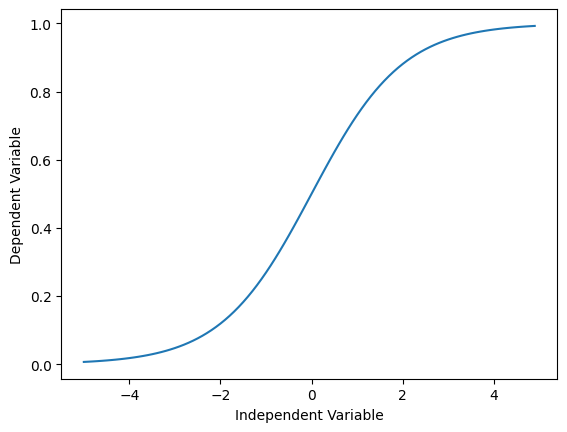

In [16]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [20]:
def sigmoidal(x , Beta_1 , Beta_2)  :
    y = 1 / (1 + np.exp(-Beta_1 * (x-Beta_2)))
    return y             

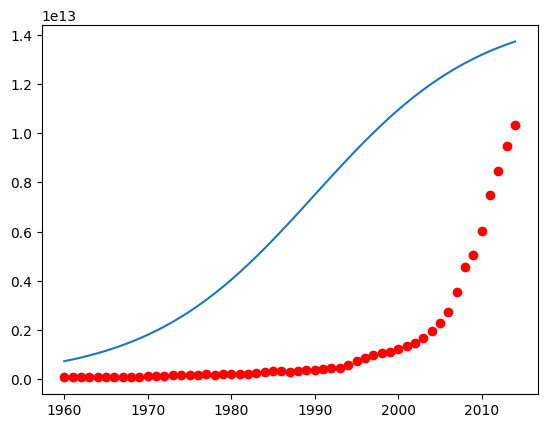

In [33]:
beta_1 = 0.10
beta_2 = 1990.0
y_pred = sigmoidal(x_data , beta_1 , beta_2)
plt.plot(x_data , y_pred *15000000000000)
plt.plot(x_data , y_data , 'ro')

### Normaliaze

In [35]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [39]:
popt , pcov = curve_fit(sigmoidal , xdata , ydata)
print("beta_1 =%f,beta_2 = %f" % (popt[0] , popt[1]))

beta_1 =690.451711,beta_2 = 0.997207


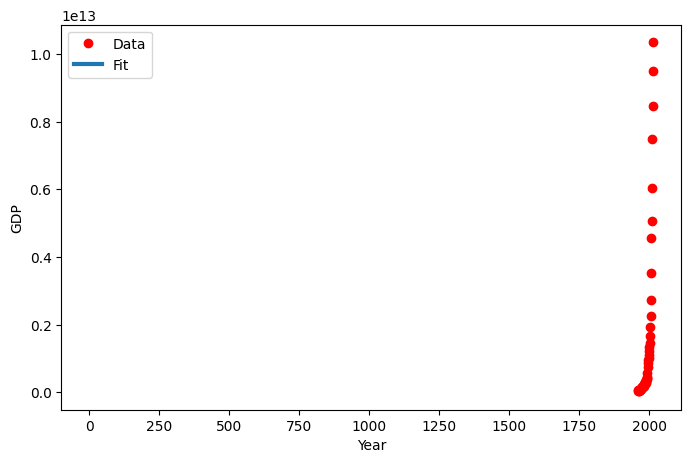

1.0


In [44]:
x = np.linspace(1960 , 2015 , 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoidal(x , *popt)
plt.plot(x_data , y_data , 'ro' , label = 'Data')
plt.plot(x,y , linewidth = 3.0  ,label = 'Fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print(sigmoidal(2015,*popt))

In [53]:
def predict_gdp(years, x_data, y_data, popt):
    years = np.array(years)
    years_norm = years / max(x_data)
    
    gdp_norm = sigmoidal(years_norm, *popt)
    
    gdp_pred = gdp_norm * max(y_data)
    
    return gdp_pred

 ## Test

In [57]:
gdp_2015 = predict_gdp(2015, x_data, y_data, popt)
print("Predicted GDP for 2015:", gdp_2015)


years = [2015 , 2016 , 2017 , 2018]
print(predict_gdp(years, x_data, y_data, popt))

Predicted GDP for 2015: 9386251381686.418
[9.38625138e+12 9.64818611e+12 9.84314695e+12 9.98637301e+12]
